In [ ]:
from google.colab import files
uploaded = files.upload()


Saving IHME_HEALTH_SPENDING_1995_2021_Y2024M07D23.CSV to IHME_HEALTH_SPENDING_1995_2021_Y2024M07D23.CSV


In [ ]:
import pandas as pd

df = pd.read_csv('IHME_HEALTH_SPENDING_1995_2021_Y2024M07D23.CSV')
print(df.head())
print(df.columns)


   location_id location_name iso3   level  year  the_total_mean  \
0            1        Global    G  Global  1995      3797193585   
1            1        Global    G  Global  1996      3913939843   
2            1        Global    G  Global  1997      4059015401   
3            1        Global    G  Global  1998      4217465565   
4            1        Global    G  Global  1999      4360508955   

   the_total_lower  the_total_upper  the_total_ppp_mean  the_total_ppp_lower  \
0       3566778350       4024956058          5119886300           4789605289   
1       3780178249       4044182157          5282325432           5054779104   
2       3960011014       4162360366          5478795810           5309050140   
3       4132939739       4310545609          5682142879           5533315214   
4       4283505691       4445882107          5849039644           5707296734   

   ...  ghes_per_gdp_upper  ppp_per_gdp_mean  ppp_per_gdp_lower  \
0  ...               0.050              0.02     

In [ ]:
df_countries = df[(df['level'] == 'Country') & (df['year'] == 2021)]


In [ ]:
print(df_countries[['location_name', 'iso3', 'the_per_cap_mean', 'ghes_per_cap_mean', 'ppp_per_cap_mean', 'oop_per_cap_mean']].head())


      location_name iso3  the_per_cap_mean  ghes_per_cap_mean  \
350     Afghanistan  AFG                97                  3   
377         Albania  ALB               528                202   
404         Algeria  DZA               237                140   
431  American Samoa  ASM               802                586   
458         Andorra  AND              3005               2224   

     ppp_per_cap_mean  oop_per_cap_mean  
350                 0                81  
377                 0               303  
404                 4                91  
431                32               184  
458               423               358  


In [ ]:
features = ['the_per_cap_mean', 'ghes_per_cap_mean', 'ppp_per_cap_mean', 'oop_per_cap_mean']
df_cluster = df_countries.dropna(subset=features)


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df_cluster[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
print(df_cluster[['location_name', 'iso3']].shape)


(204, 2)


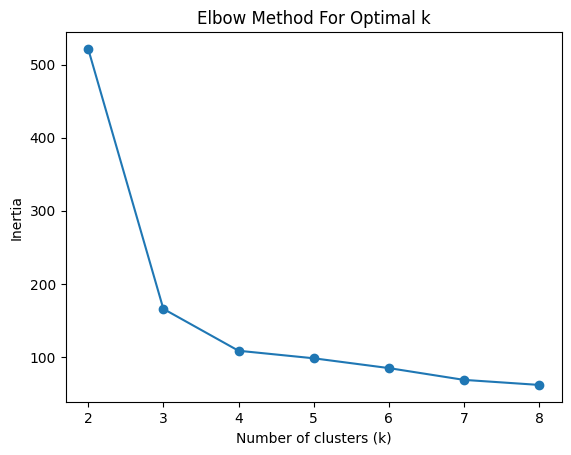

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Evaluate k from 2 to 8
inertia = []
K_range = range(2, 9)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df_cluster['cluster'] = labels


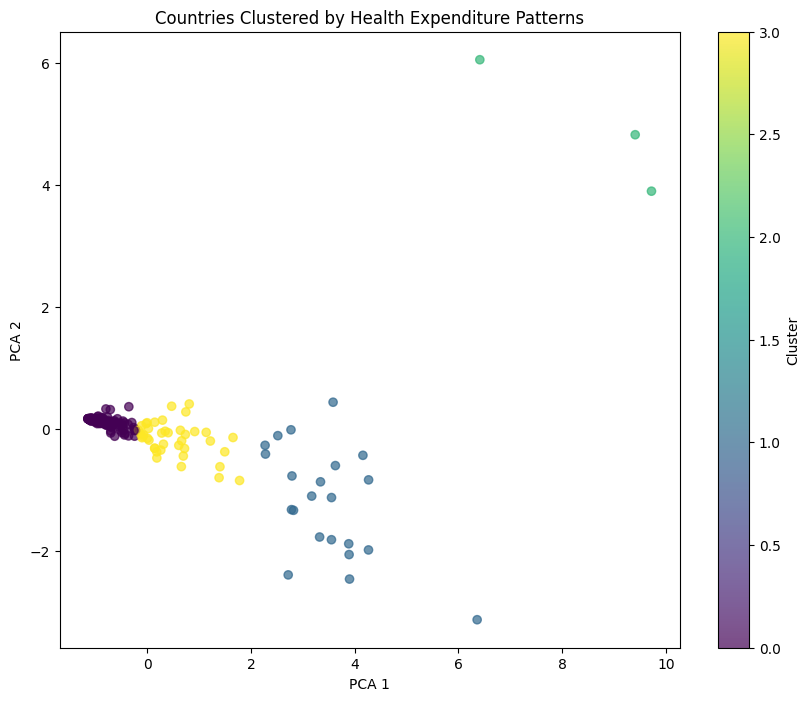

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Countries Clustered by Health Expenditure Patterns')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
for i in range(4):
    print(f"\nCluster {i}:")
    display(df_cluster[df_cluster['cluster'] == i][['location_name', 'the_per_cap_mean', 'ghes_per_cap_mean', 'oop_per_cap_mean']].sort_values('the_per_cap_mean', ascending=False))



Cluster 0:


,location_name,the_per_cap_mean,ghes_per_cap_mean,oop_per_cap_mean
5264,Tokelau,1384,444,254
1511,Croatia,1308,1099,123
4211,Poland,1107,799,224
1484,Costa Rica,1046,725,218
3968,Oman,1022,889,63
...,...,...,...,...
1673,Democratic Republic of the Congo,31,4,10
4994,Sudan,30,6,13
3185,Madagascar,19,4,6
1916,Eritrea,18,3,7



Cluster 1:


,location_name,the_per_cap_mean,ghes_per_cap_mean,oop_per_cap_mean
3941,Norway,10273,8790,1444
3482,Monaco,7762,6984,528
1538,Cuba,7694,7041,648
2537,Iceland,7286,6099,1063
2267,Greenland,7058,7058,0
593,Australia,7042,5359,970
1700,Denmark,7026,6004,868
3158,Luxembourg,6957,6126,620
1241,Canada,6767,4939,946
2672,Ireland,6489,5029,690



Cluster 2:


,location_name,the_per_cap_mean,ghes_per_cap_mean,oop_per_cap_mean
5615,United States of America,13044,7224,1401
5075,Switzerland,10361,3745,2353
890,Bermuda,8021,2463,889



Cluster 3:


,location_name,the_per_cap_mean,ghes_per_cap_mean,oop_per_cap_mean
4562,San Marino,4105,3444,465
2780,Japan,3541,3000,426
4940,Spain,3115,2229,654
2726,Italy,3037,2292,665
458,Andorra,3005,2224,358
4319,Republic of Korea,2931,1800,833
4805,Slovenia,2677,1965,345
1592,Czechia,2529,2179,322
5507,United Arab Emirates,2484,1627,272
4238,Portugal,2481,1567,721


In [ ]:
df_cluster.to_csv('clustered_health_expenditure_countries.csv', index=False)
from google.colab import files
files.download('clustered_health_expenditure_countries.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving clustered_health_expenditure_countries.csv to clustered_health_expenditure_countries.csv


In [3]:
import pandas as pd
df = pd.read_csv('clustered_health_expenditure_countries.csv')


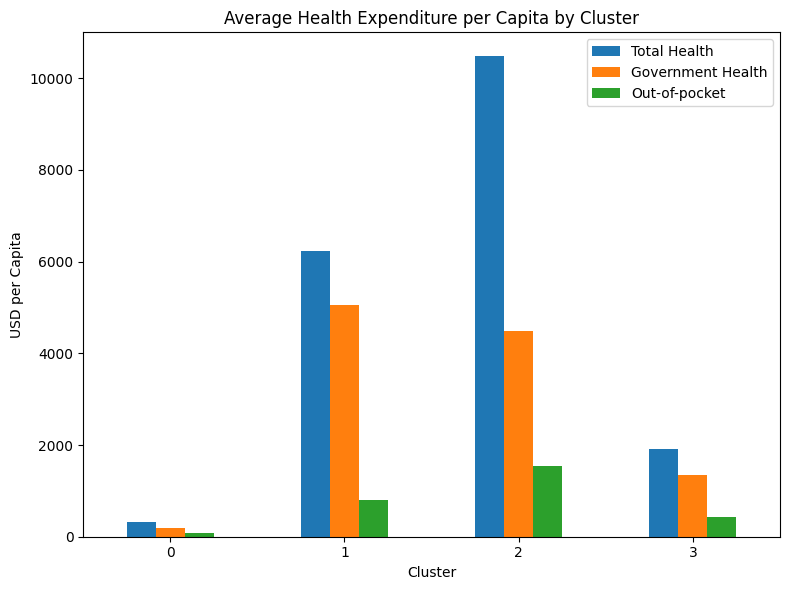

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the clustered data (you already uploaded the file)
df = pd.read_csv('clustered_health_expenditure_countries.csv')

# Group by cluster and calculate the mean for key metrics
avg_metrics = df.groupby('cluster')[['the_per_cap_mean', 'ghes_per_cap_mean', 'oop_per_cap_mean']].mean()

# Plot side-by-side bars for each metric in each cluster
ax = avg_metrics.plot(kind='bar', figsize=(8,6))
plt.title('Average Health Expenditure per Capita by Cluster')
plt.xlabel('Cluster')
plt.ylabel('USD per Capita')
plt.xticks(rotation=0)
plt.legend(['Total Health', 'Government Health', 'Out-of-pocket'])
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv('clustered_health_expenditure_countries.csv')

# Plot a world map with countries colored by cluster assignment
fig = px.choropleth(
    df,
    locations='iso3',               # ISO3 code column for country mapping
    color='cluster',                # Assign color by cluster label
    hover_name='location_name',     # Show country name on hover
    color_continuous_scale='Viridis', # Or any scale you like (Plasma, Rainbow)
    title='Countries Clustered by Health Expenditure'
)
fig.update_geos(showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


In [6]:
import pandas as pd

# Load your data
df = pd.read_csv('clustered_health_expenditure_countries.csv')

# Select the columns to display in the table
table_columns = [
    'location_name',
    'iso3',
    'cluster',
    'the_per_cap_mean',
    'ghes_per_cap_mean',
    'oop_per_cap_mean'
]

# Display the table (first 20 rows as an example)
df[table_columns].head(20)


,location_name,iso3,cluster,the_per_cap_mean,ghes_per_cap_mean,oop_per_cap_mean
0,Afghanistan,AFG,0,97,3,81
1,Albania,ALB,0,528,202,303
2,Algeria,DZA,0,237,140,91
3,American Samoa,ASM,0,802,586,184
4,Andorra,AND,3,3005,2224,358
5,Angola,AGO,0,114,63,26
6,Antigua and Barbuda,ATG,0,1002,671,194
7,Argentina,ARG,3,1307,807,288
8,Armenia,ARM,3,727,127,568
9,Australia,AUS,1,7042,5359,970


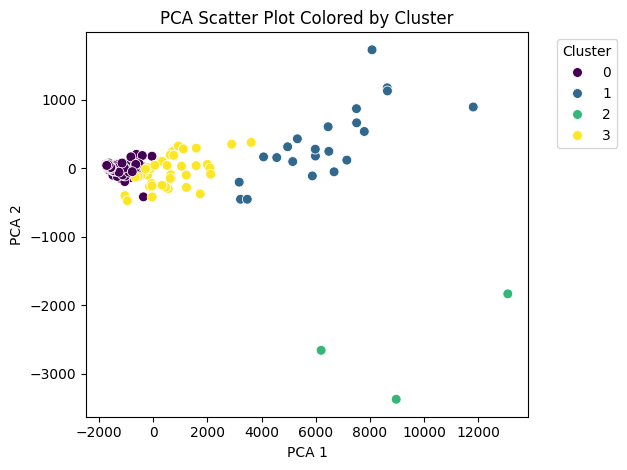

In [8]:
from sklearn.decomposition import PCA

# Select relevant numeric columns
features = ['the_per_cap_mean', 'ghes_per_cap_mean', 'oop_per_cap_mean']
X = df[features].fillna(0)

# Compute PCA (2 components)
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(X)
df['PCA1'] = pca_coords[:, 0]
df['PCA2'] = pca_coords[:, 1]

# Then plot as above!
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50)
plt.title('PCA Scatter Plot Colored by Cluster')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [10]:
from ipywidgets import widgets

def filter_table(cluster, year):
    filtered = df[(df['cluster'] == cluster) & (df['year'] == year)]
    display(filtered[['location_name', 'iso3', 'the_per_cap_mean', 'ghes_per_cap_mean', 'oop_per_cap_mean']])

clusters = sorted(df['cluster'].unique())
years = sorted(df['year'].unique())
interact(filter_table,
         cluster=clusters,
         year=years)


interactive(children=(Dropdown(description='cluster', options=(np.int64(0), np.int64(1), np.int64(2), np.int64…

<function __main__.filter_table(cluster, year)>